# Bonus - SQL Challenge
----
### Connect to DB and Analyze data

In [1]:
#Import dependencies
from sqlalchemy import create_engine
from config import db_url
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
engine = create_engine(db_url)
connection = engine.connect()

In [3]:
salary_df = pd.read_sql_table('salaries', connection) 
salary_df

,emp_no,salary,from_date,to_date
0,10001,60117.0,1986-06-26,1987-06-26
1,10002,65828.0,1996-08-03,1997-08-03
2,10003,40006.0,1995-12-03,1996-12-02
3,10004,40054.0,1986-12-01,1987-12-01
4,10005,78228.0,1989-09-12,1990-09-12
...,...,...,...,...
300019,499995,40000.0,1997-06-02,1998-06-02
300020,499996,58058.0,1996-05-13,1997-05-13
300021,499997,49597.0,1987-08-30,1988-08-29
300022,499998,40000.0,1993-12-27,1994-12-27


#### Most Common Employee Salary Histogram

In [4]:
salaries = salary_df.salary

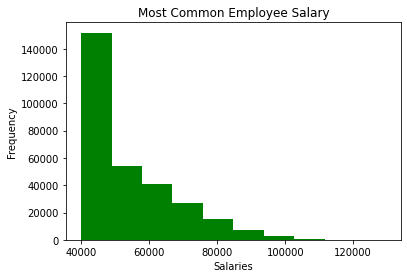

In [5]:
salaries.plot.hist(color='green')
plt.title("Most Common Employee Salary")
plt.xlabel("Salaries")
plt.savefig('Images/Most Common Employee Salary_HIST.jpg')
plt.show()

#### Average Salary by Department Bar Chart

In [6]:
sql_qry='''SELECT c.dept_name AS "Department Name", ROUND(AVG(a.salary),2) AS "Avg Salary"
    FROM salaries a
    LEFT JOIN dept_emp b
    ON a.emp_no=b.emp_no
    LEFT JOIN departments c
    ON b.dept_no=c.dept_no
    GROUP BY c.dept_name'''
dept_salary_df = pd.read_sql_query(sql_qry, connection) 
dept_salary_df=dept_salary_df.set_index('Department Name')
dept_salary_df

,Avg Salary
Department Name,
Customer Service,47998.67
Development,48697.33
Finance,59533.52
Human Resources,44678.65
Marketing,61095.90
Production,48760.45
Quality Management,46456.01
Research,48850.19
Sales,69832.13


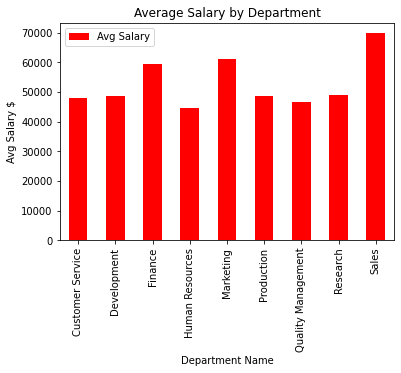

In [7]:
plot=dept_salary_df.plot(kind='bar', facecolor='red')
plt.title('Average Salary by Department')
plt.ylabel("Avg Salary $")
plt.savefig('Images/Average Salary by Department_BAR.jpg')
plt.show()

In [8]:
connection.close()